# Altitude Profiles


This notebook can plot altitude profile comparisons of aircraft and model data, both as a scatter graph and as a line graph, by sorting the altitude data into bins.

## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

# Stops warnings from being printed.
import warnings
warnings.filterwarnings('ignore')

## Define plotting function

Now that we've set up the imports, we can define the function producing the plots that we'll use later.

In [2]:
def plot_altitude_profile(full_df,df,plotdir,key,label,a_colour,m_colour,alt_bin,avg_method,min_method,max_method,model) :
    
    """
    Plot altitude profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the altitude data.
    alt_data = df['Altitude']
    
    # Read the aircraft and/or model data from the data frame.
    data = pre.read_data_values(df,model)

    # Plot the data; a scatter plot of average pollution recorded by the aircraft against altitude.
    # Change marker size by adjusting 's'.
    plt.scatter(data['a_avg'],alt_data,s=10,c=a_colour,label='Aircraft')
        
    # Do the same for the model data, if it exists.
    if(model):
        # Change marker size by adjusting 's'.
        plt.scatter(data['m_avg'],alt_data,s=10,c=m_colour,label='Model')
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    plt.show()

    """
    Plot altitude profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the binned data; the pollution data is sorted into altitude bins of predefined width (i.e. 50 metres).
    data = pre.bin_altitude_data(full_df,avg_method,min_method,max_method,alt_bin,model)

    # Plot the data; a line plot of the average pollution in each bin against altitude.
    plt.plot(data['a_avg'], data['binned'],lw=5,c=a_colour,label='Aircraft')
    # Display the data range for each bin.
    plt.fill_betweenx(data['binned'], data['a_min'], data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    # Do the same for the model data, if it exists.
    if(model):
        plt.plot(data['m_avg'], data['binned'],lw=5,c=m_colour,label='Model')
        plt.fill_betweenx(data['binned'], data['m_min'], data['m_max'],fc=m_colour,ec=None,alpha=0.5)
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    plt.show()

## Specify the flight number & model data

In [7]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

# Specify whether you have model data to plot.
model = True

## Prepare the data and plot for each pollution species

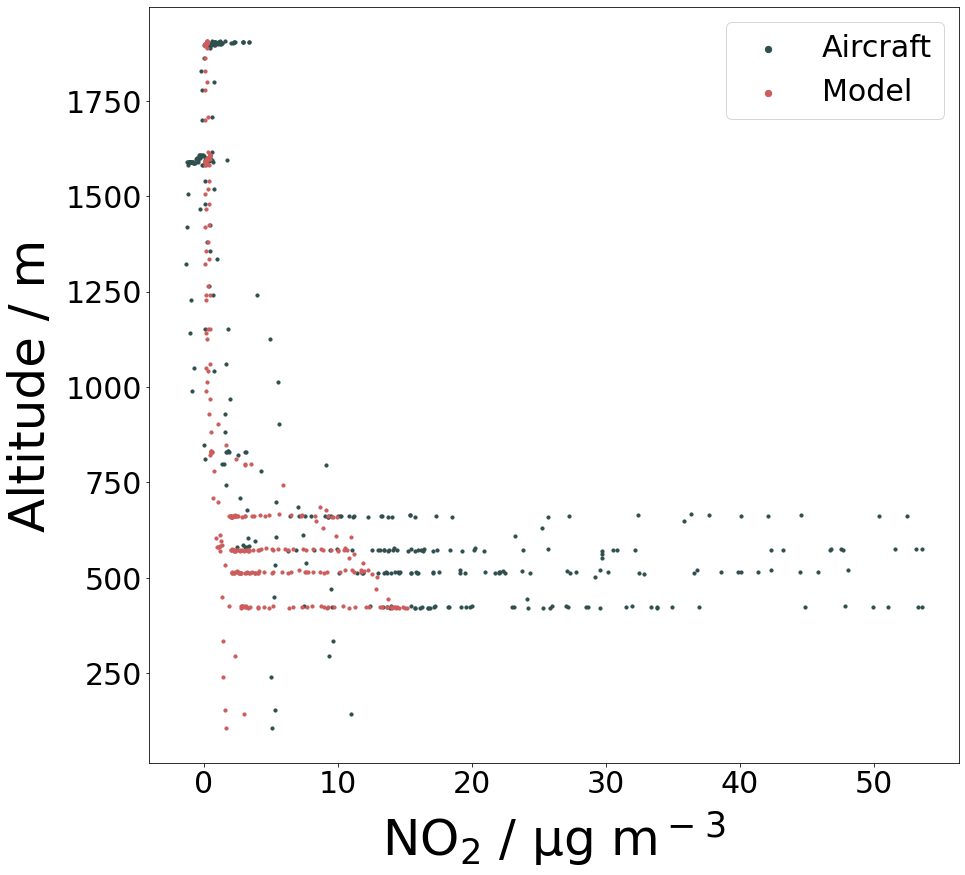

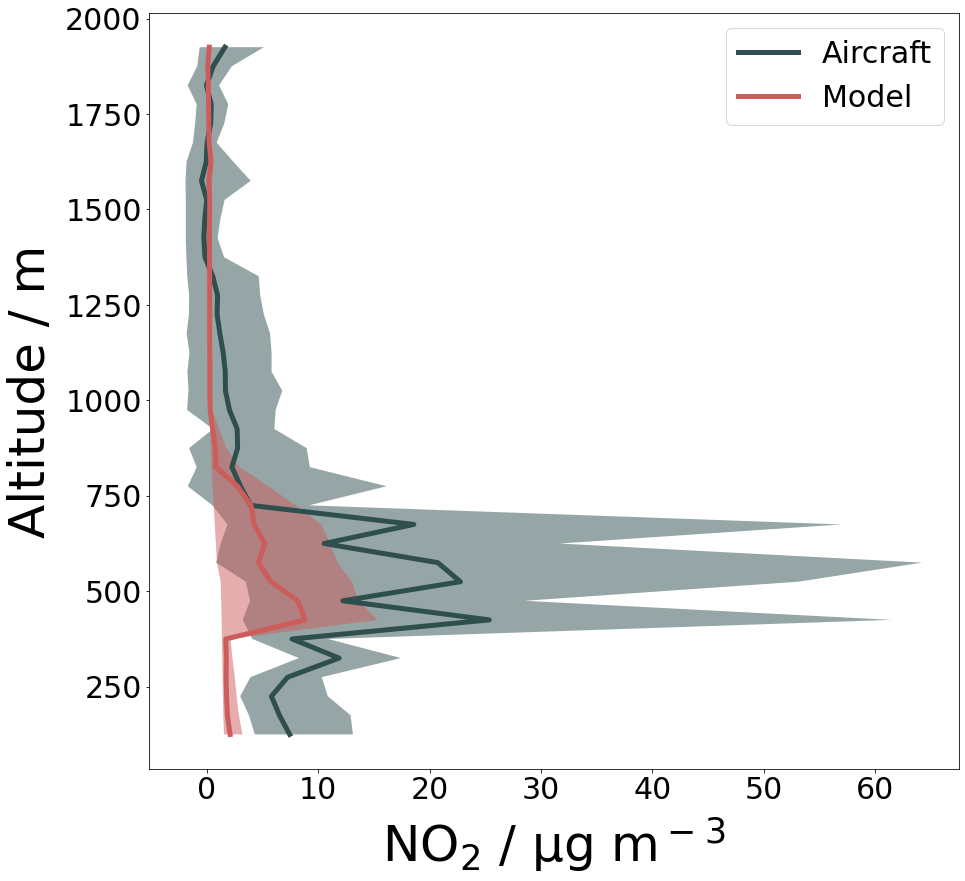

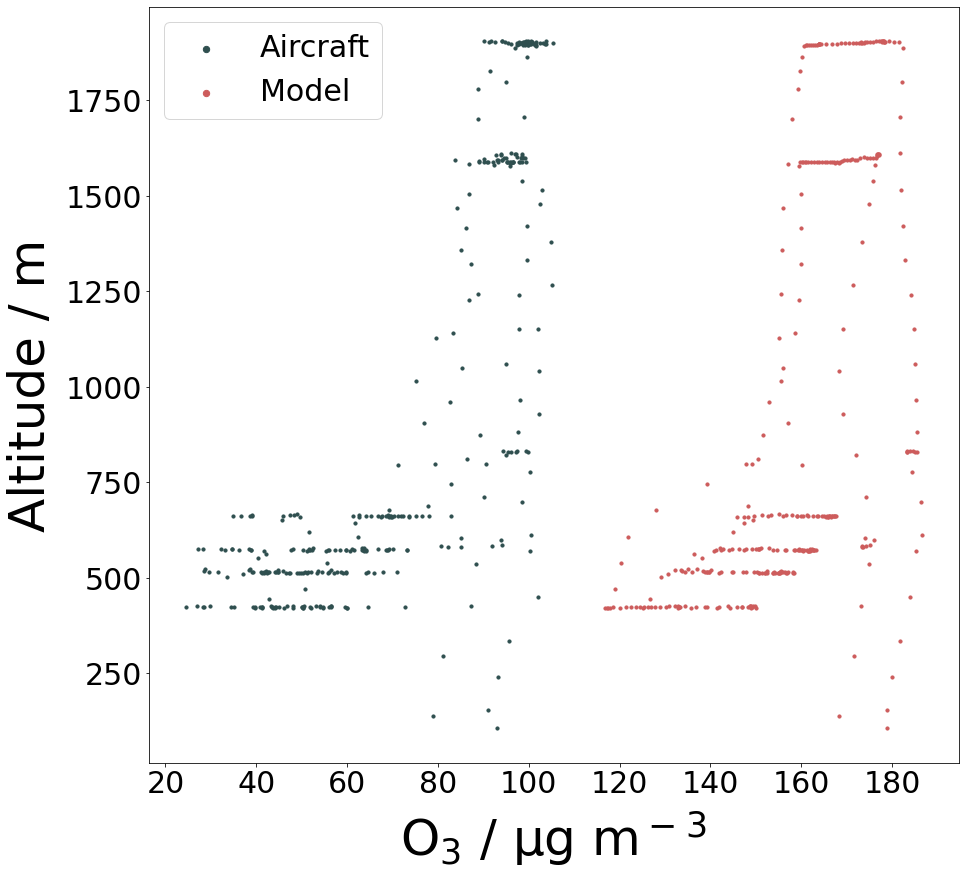

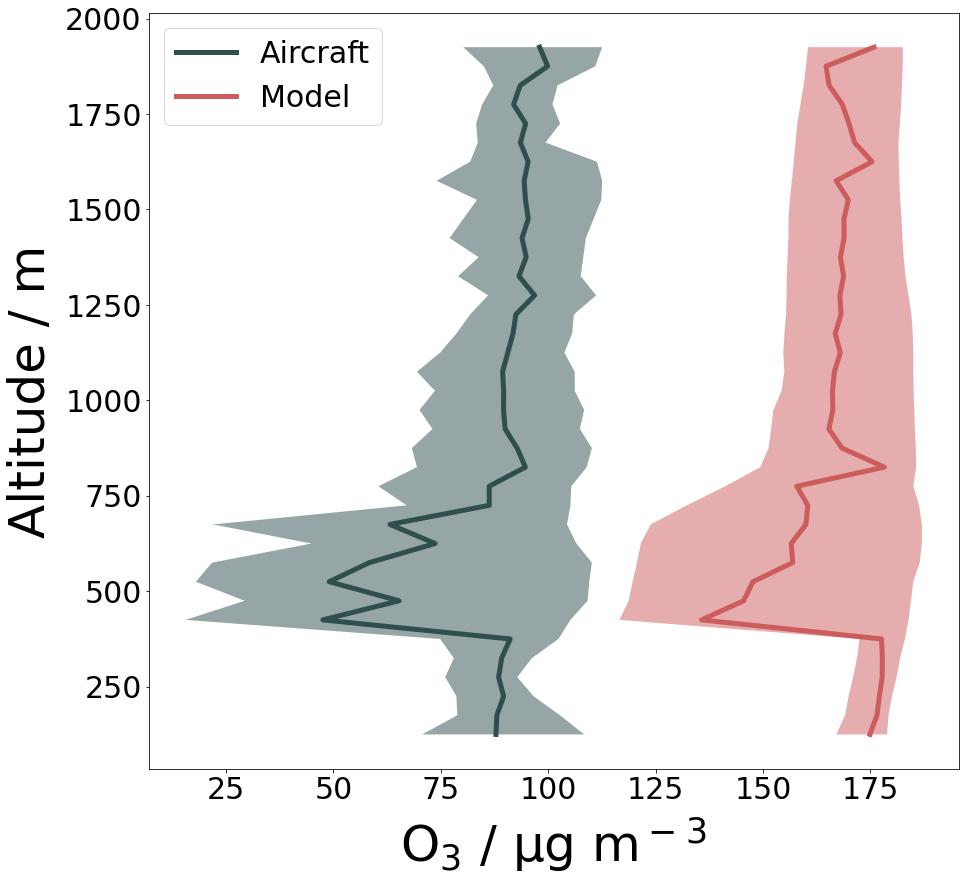

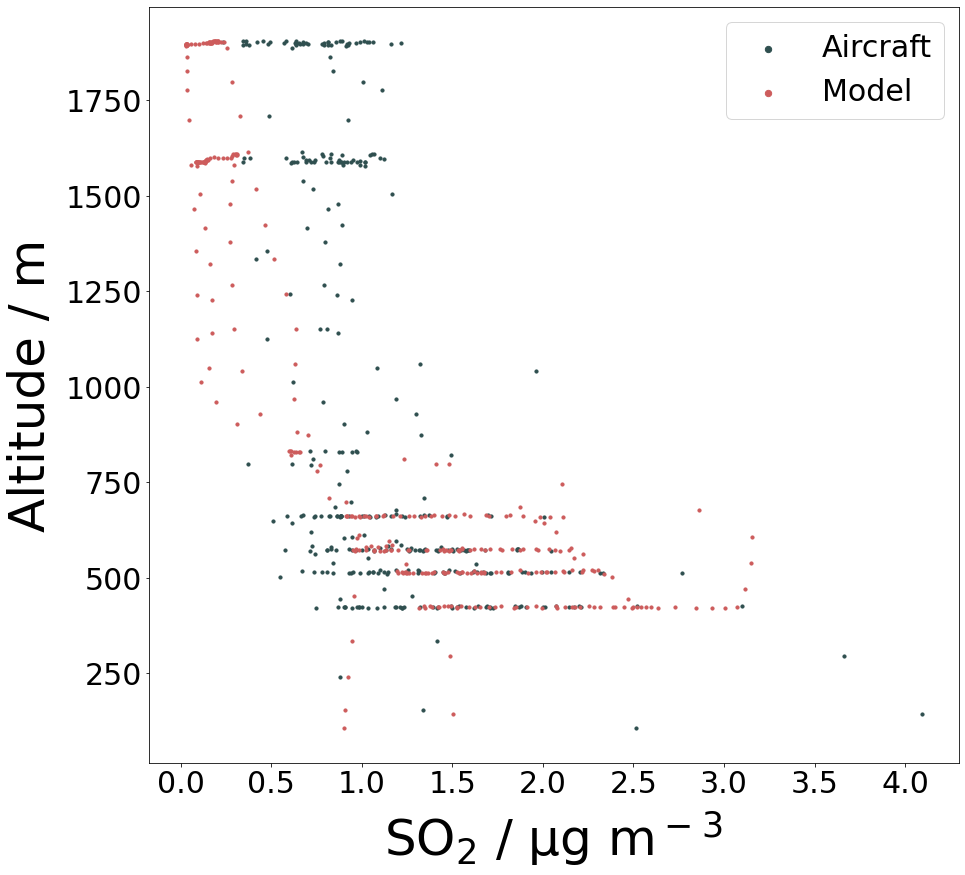

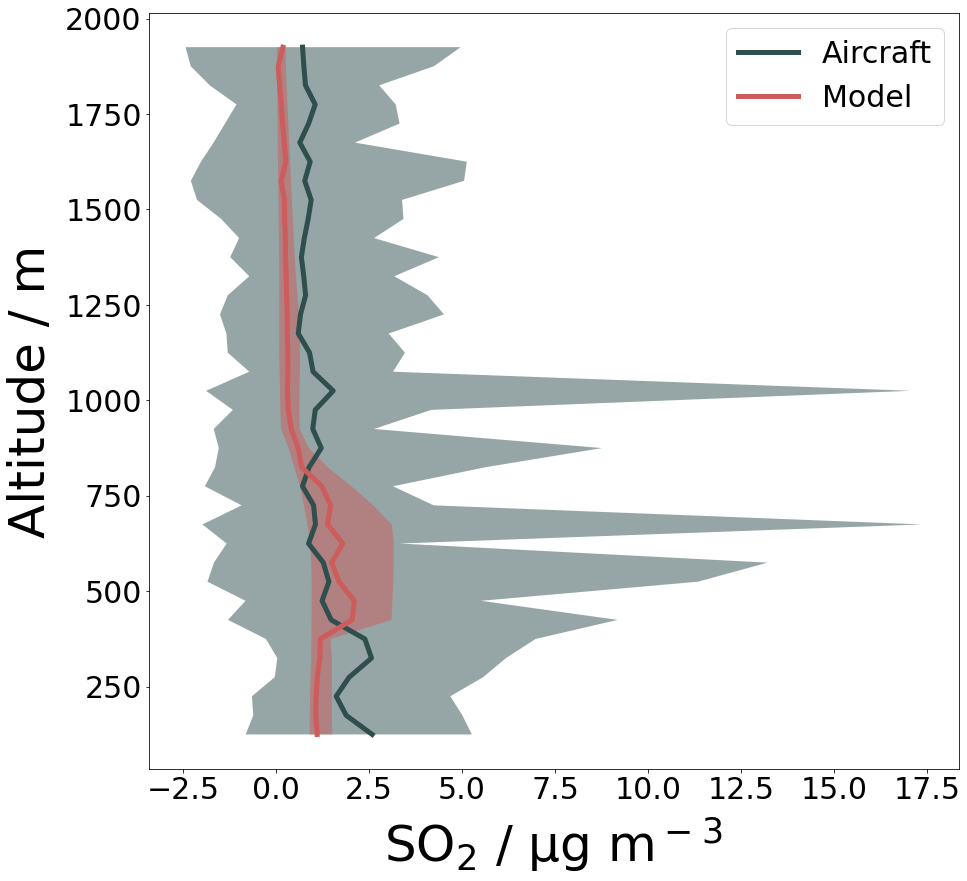

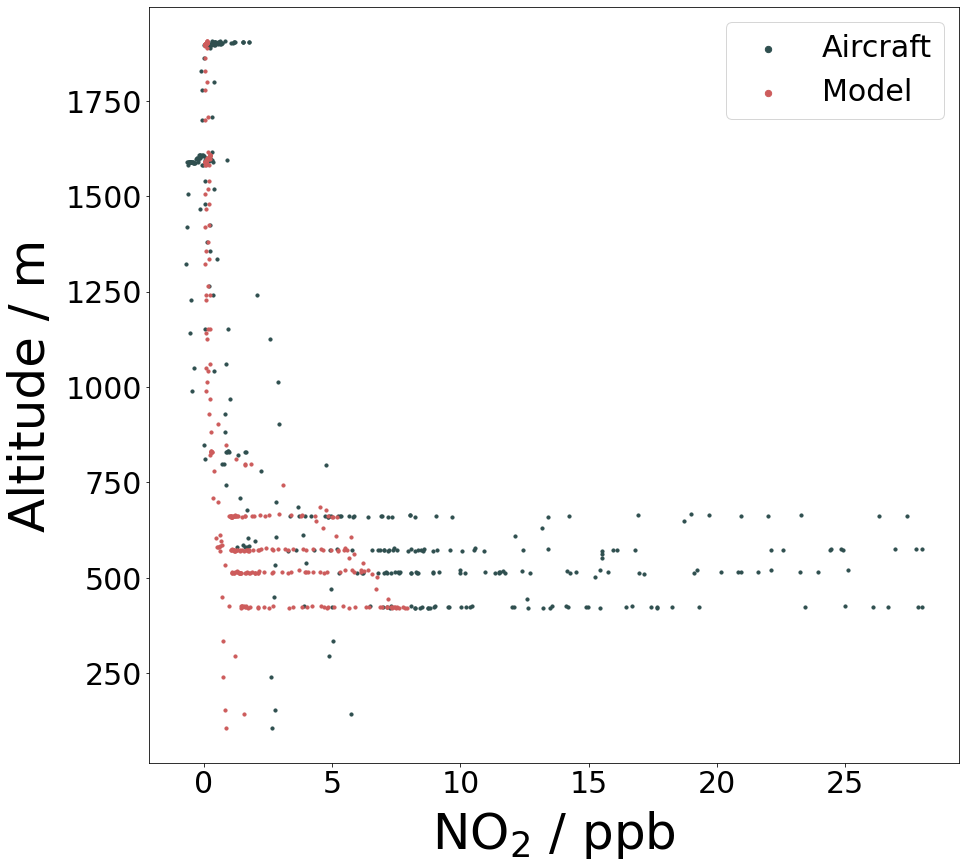

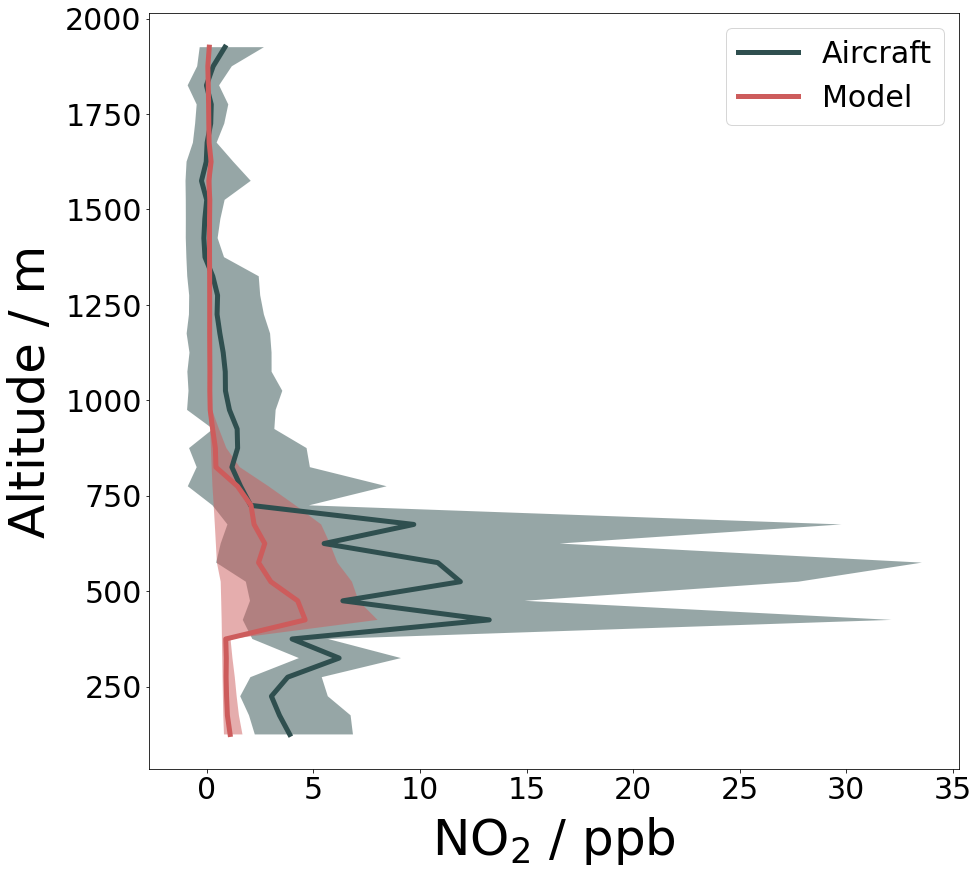

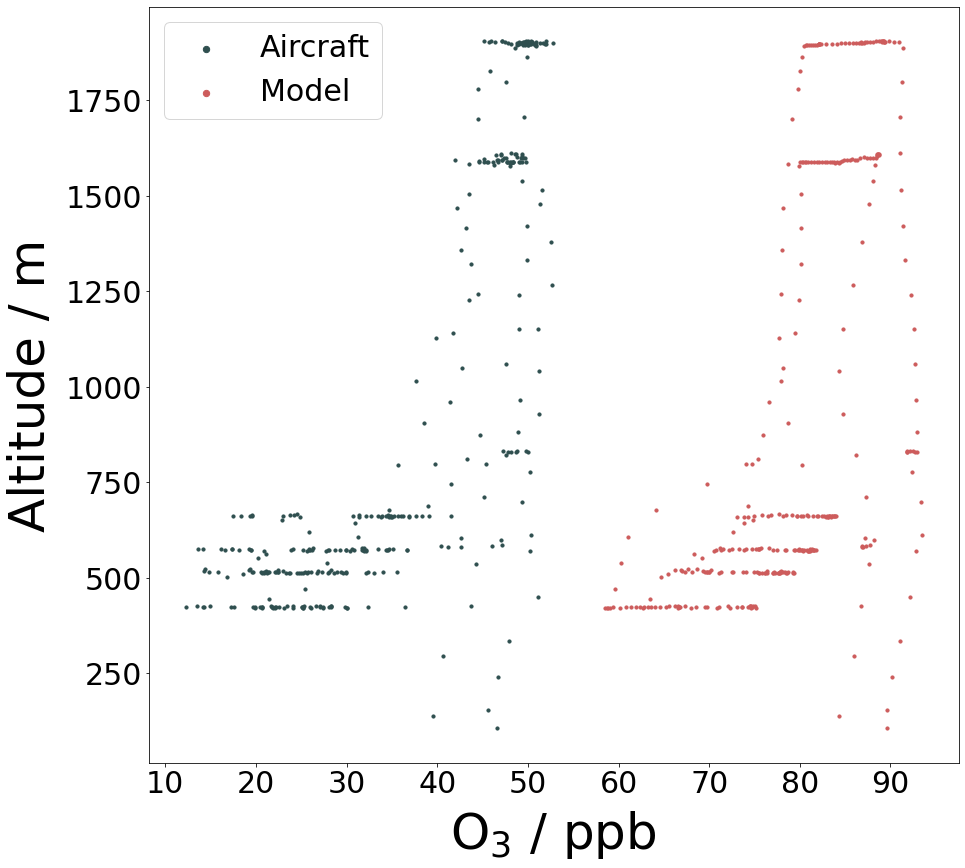

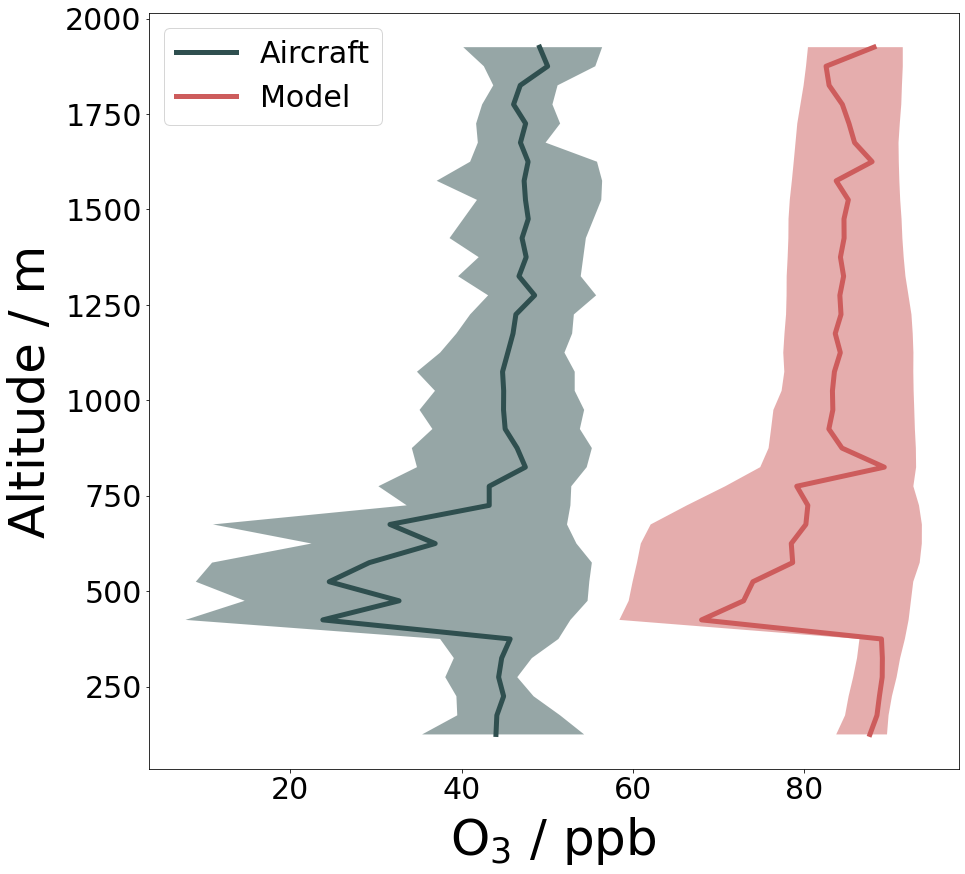

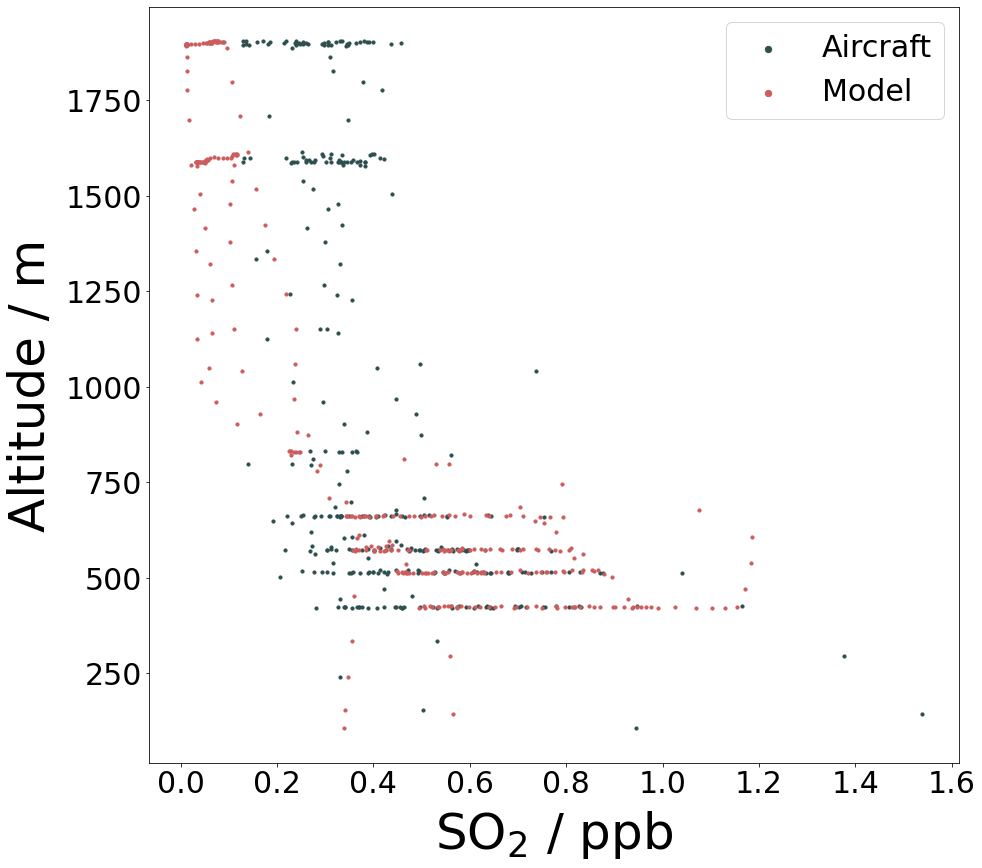

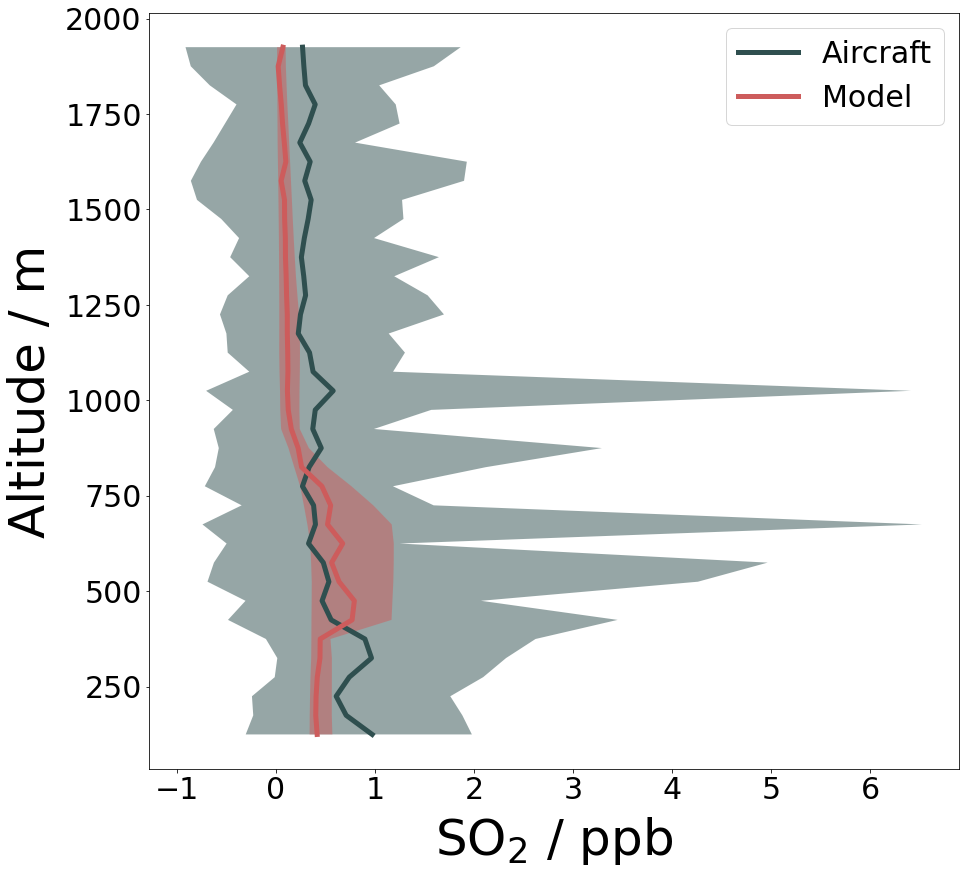

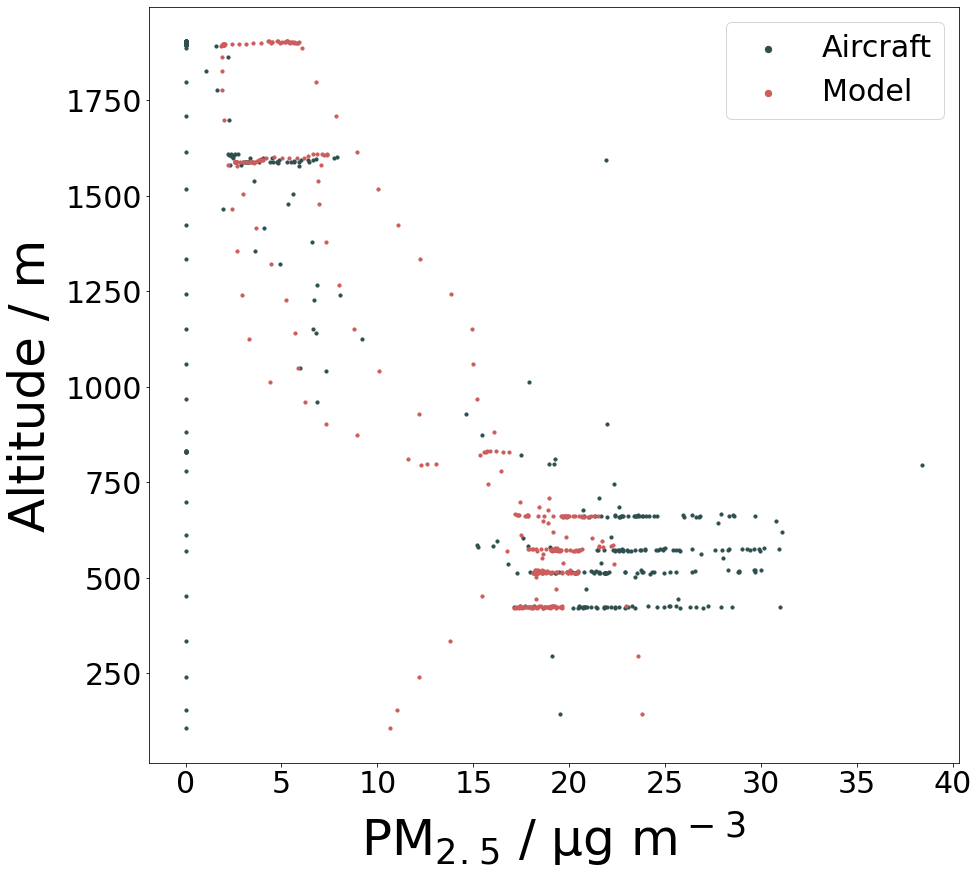

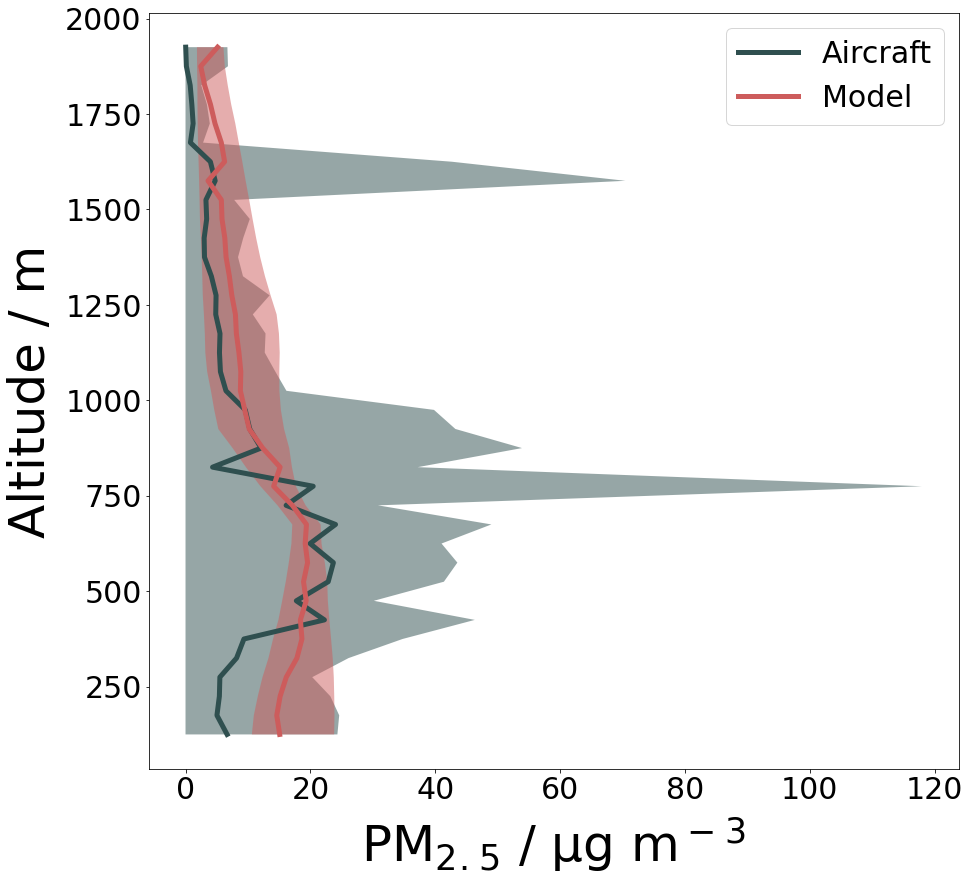

In [8]:
# Define the pollutant species.
species_dict = pre.species_dictionary()

# Define various options, including flight information, data location and sampling parameters.
setup = pre.setup_notebook(flight_number, model) 
optns = setup[4]

# Loop through the pollutant species, producing plots for each.
for key in species_dict.keys() :
    
    # Setup the species information.
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

    # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)
    
    # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'], model) 
    
    # Produce the plots.
    plot_altitude_profile(df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['alt_bin'],optns['avg_method'],optns['min_method'],optns['max_method'], model)